# Imports


In [15]:
import sys
import pandas as pd
import dill as pickle
# to save results to data directory
module_path = '..'
if module_path not in sys.path:
    sys.path.insert(1, module_path)
# increase displayed columns in jupyter notebook
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

In [16]:

import matplotlib
import logging

import numpy as np
import matplotlib.pyplot as plt

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# temporarily remove deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

logging.basicConfig(format='%(asctime)s: %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p')
logger = logging.getLogger("TimeSeries")
logger.setLevel(logging.INFO)

output_dir = 'hydraulic_output'

# Dataset

In [17]:
with open(f"_data/crane-sim/data.pkl", "rb") as fh:
    data = pickle.load(fh)

with open(f"_data/crane-sim/models.pkl", "rb") as fh:
    models = pickle.load(fh)


In [18]:
outlier_keys = ["force:1", "pA:1"]

y_labels = ["Force ($N$)", "Pressure ($Pa$)"]
x_label = "Time (s)"

height = 4
width = 6

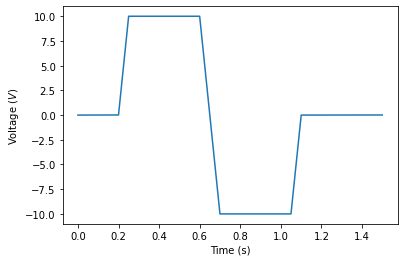

<Figure size 432x288 with 0 Axes>

In [19]:
# Control Signal Plot
signal_df = data.copy()
fig,ax = plt.subplots()
# make a plot
key = 'u:1'
ax.plot(signal_df['time'],signal_df[key])
ax.set_xlabel(x_label)
ax.set_ylabel('Voltage ($V$)')

plt.show()
# save the plot as a file
fig.set_size_inches(w=width, h=height)
plt.savefig(f'{output_dir}/input_sig_u.pgf')

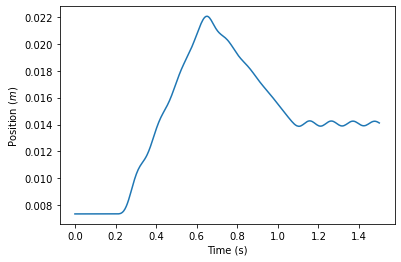

<Figure size 432x288 with 0 Axes>

In [20]:
# Pos Signal Plot
signal_df = data.copy()
fig,ax = plt.subplots()
# make a plot
key = 'pos:1'
ax.plot(signal_df['time'],signal_df[key])
ax.set_xlabel(x_label)
ax.set_ylabel('Position ($m$)')

plt.show()
# save the plot as a file
fig.set_size_inches(w=width, h=height)
plt.savefig(f'{output_dir}/input_sig_pos.pgf')

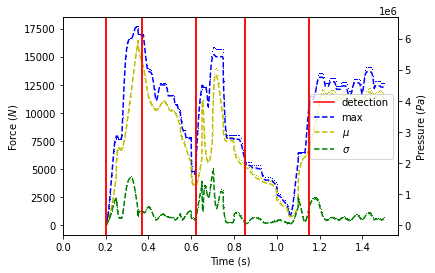

<Figure size 432x288 with 0 Axes>

In [21]:
# In progress Plot
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
signal_df = data.copy()

key_pos = 0
signal_df = signal_df.iloc[models[outlier_keys[key_pos]].ts_size: , :]
first_entry = True
# make a plot

ax.plot(signal_df['time'],models[outlier_keys[key_pos]].max_val,'b,')
ax.plot(signal_df['time'],models[outlier_keys[key_pos]].max_mean,'y,')
ax.plot(signal_df['time'],models[outlier_keys[key_pos]].max_std_dev,'g,')
ax.set_xlabel(x_label)
ax.set_ylabel(y_labels[key_pos])
ax.set_xlim(xmin=0)
for i in models[outlier_keys[key_pos]].anomalies:
    row = signal_df.iloc[i-models[outlier_keys[key_pos]].ts_size]
    if first_entry:
        ax.axvline(x=row['time'],color='r',label='detection')
        first_entry=False
    else:
        ax.axvline(x=row['time'],color='r')
# twin object for two different y-axis on the sample plot
key_pos = 1
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(signal_df['time'],models[outlier_keys[key_pos]].max_val,'b--', label='max')
ax2.plot(signal_df['time'],models[outlier_keys[key_pos]].max_mean,'y--',label=r'$\mu$')
ax2.plot(signal_df['time'],models[outlier_keys[key_pos]].max_std_dev,'g--',label=r'$\sigma$')
ax2.set_ylabel(y_labels[key_pos])
ax2.set_xlim(xmin=0)

for i in models[outlier_keys[key_pos]].anomalies:
    row = signal_df.iloc[i-models[outlier_keys[key_pos]].ts_size]
    ax2.axvline(x=row['time'],color='r')


fig.legend(loc='center right',bbox_to_anchor=(1,0.5),bbox_transform=ax.transAxes)
plt.show()

# save the plot as a file
fig.set_size_inches(w=width, h=height)
plt.savefig(f'{output_dir}/mp_hist_scale_variant_pressure_force.pgf')

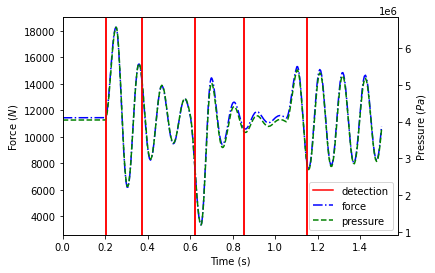

<Figure size 432x288 with 0 Axes>

In [22]:
# Detection plot
# create figure and axis objects with subplots()
signal_df = data.copy()
fig,ax = plt.subplots()
key_pos = 0
first_entry = True


for i in models[outlier_keys[key_pos]].anomalies:
    row = signal_df.iloc[i]
    if first_entry:
        ax.axvline(x=row['time'],color='r',label='detection')
        first_entry=False
    else:
        ax.axvline(x=row['time'],color='r')

ax.plot(signal_df['time'],signal_df[outlier_keys[key_pos]],'b-.', label='force')

ax.set_xlabel(x_label)
ax.set_ylabel(y_labels[key_pos])
ax.set_xlim(xmin=0)

# twin object for two different  y-axis on the sample plot
key_pos = 1
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(signal_df['time'],signal_df[outlier_keys[key_pos]],'g--', label='pressure')
for i in models[outlier_keys[key_pos]].anomalies:
    row = signal_df.iloc[i]
    ax2.axvline(x=row['time'],color='r')

ax2.set_ylabel(y_labels[key_pos])
ax2.set_xlim(xmin=0)

fig.legend(loc='lower right',bbox_to_anchor=(1,0),bbox_transform=ax.transAxes)
plt.show()
# save the plot as a file
fig.set_size_inches(w=width, h=height)
plt.savefig(f'{output_dir}/outlier_result_scale_variant_detection.pgf')

